In [1]:
from nltk.corpus import twitter_samples
import nltk
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
from nltk.tokenize import TweetTokenizer
from nltk import SnowballStemmer
spanishstemmer=SnowballStemmer('spanish')
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import spacy
from stylecloud import gen_stylecloud
from PIL import Image

2022-11-10 07:20:54.078461: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 07:21:04.253928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-10 07:21:04.254051: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 07:21:04.981318: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 07:21:29.376324: W tensorflow/stream_executor/platform/de

In [2]:
def get_wordcloud(text, icon="fas fa-comments", background_color=None, output_name="./wordcloud.png"):
    # https://fontawesome.com/icons/alicorn?s=solid
    gen_stylecloud(text=text, icon_name=icon, background_color=background_color, output_name=output_name)
    return Image.open(output_name)

In [3]:
df=pd.read_csv('final.csv')
df.columns=['mensaje','sentimiento']

In [4]:
df=df.drop(df[df['sentimiento']=='sentimiento'].index)
df.to_csv('final2.csv',index=False)

In [5]:
df=pd.read_csv('final2.csv')
df.columns=['mensaje','sentimiento']
df=df.drop(df[df['sentimiento']<-1].index)
df

,mensaje,sentimiento
6,Alguien anoto el grupo del profe?\n,0
9,Va gracias\n,1
11,Oigan alguien se acuerda como se llamaba el p...,0
12,O en qué libro lo veíamos?\n,0
15,de la pagina 52\n,0
...,...,...
6426,Oh\n,0
6427,No están en discord?\n,0
6428,Ese puedo conseguirlo\n,0
6430,"No sé, ahí yo no estoy\n",0


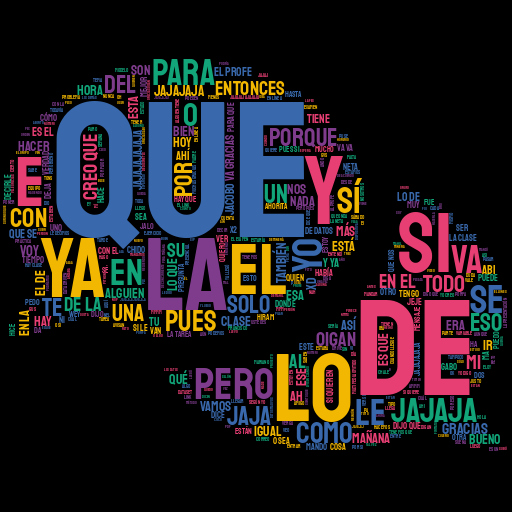

In [6]:
get_wordcloud(text = " ".join(df["mensaje"]))

In [7]:
import nltk
from nltk import SnowballStemmer
spanishstemmer=SnowballStemmer('spanish')
#stems = [spanishstemmer.stem(token) for token in tokens]

In [8]:
import spacy
nlp = spacy.load('es_core_news_sm')
def normalize(text):
    doc = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    lexical_tokens = [t.lower() for t in words if len(t) > 1 and     
    t.isalpha()]
    lexical_tokens=[spanishstemmer.stem(token) for token in lexical_tokens]
    return lexical_tokens

In [9]:
df['mensaje']=df['mensaje'].apply(normalize)

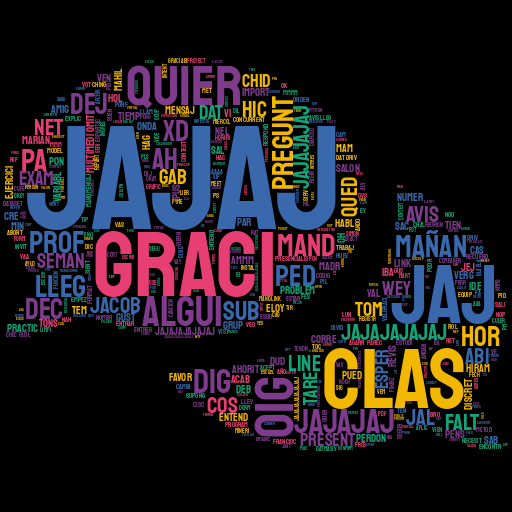

In [10]:
get_wordcloud(text = " ".join(df["mensaje"].str.join(' ')))

In [11]:
df=df.drop(df[df.mensaje.apply(len)==0].index)

In [12]:
def formato(lista):
    temp=[[x,True] for x in lista]
    return dict(temp)

In [13]:
df.mensaje=df.mensaje.apply(formato)

In [14]:
lista=[]
sentimientos=df.sentimiento.unique()
minimo=len(df)
for valor in sentimientos:
    longitud=len(df[df['sentimiento']==valor])
    if longitud<minimo:
        minimo=longitud   
print(minimo)
for valor in sentimientos:
    lista.append(df[df['sentimiento']==valor].iloc[0:minimo])
    #print(df[df['sentimiento']==valor].iloc[0:minimo].shape)
df=pd.concat(lista)
df.shape

638


(1914, 2)

In [15]:
X=df.mensaje
y=df.sentimiento

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
classifier = NaiveBayesClassifier.train(list(zip(X_train,y_train)))

In [18]:
print("Accuracy is:", classify.accuracy(classifier, list(zip(X_test,y_test))))

Accuracy is: 0.6161879895561357


In [19]:
print("Accuracy is:", classify.accuracy(classifier, list(zip(X_train,y_train))))

Accuracy is: 0.8752449379490529


In [27]:
cadena= input()
cadena=formato(normalize(cadena))

print(classifier.classify(cadena))

me siento bien
-1


In [26]:
cadena= input()
cadena=formato(normalize(cadena))

print(classifier.classify(cadena))

no me siento bien
-1


In [24]:
df[df['sentimiento']==1]

,mensaje,sentimiento
9,{'graci': True},1
21,"{'aaa': True, 'libr': True, 'jajaj': True, 'ma...",1
22,"{'vi': True, 'xd': True}",1
24,{'perfect': True},1
25,{'preocup': True},1
...,...,...
3459,{'jal': True},1
3468,{'jajajajajajaj': True},1
3489,{'jajajajajaj': True},1
3509,{'facil': True},1
